# OCR system (NAVIE BAYES CLASSIFIER)

In [143]:
# Importing important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
# Loading data's files
# Training data
TrainX = np.loadtxt("trainX.txt")
TrainY = np.loadtxt("trainY.txt")

# Testing data
TestX = np.loadtxt("testX.txt")
TestY = np.loadtxt("testY.txt")

In [133]:
print(TrainX)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [130]:
print(TrainY)

In [131]:
print(TestX)

In [132]:
print(TestY)

In [134]:
TrainX.shape

(500, 256)

## Training data

In [140]:
# Dividing the Training data
div = int(len(TrainX) / 2)

TrainX_given2 = TrainX[:div]
TrainX_given4 = TrainX[div:]

In [141]:
TrainX_given2.shape

(250, 256)

In [142]:
TrainX_given4.shape

(250, 256)

In [155]:
# Computing All the probabilities from Training data set (Also apply Smoothing)

# x = 1 & x = 0 , given 2 probabilities
TrainX_2_prob = div /2
Xone_given2_prob = (np.sum(TrainX_given2, axis=0) + 1) / (TrainX_given2.shape[0] + 2)
Xzero_given2_prob = 1 - Xone_given2_prob 

# x = 1 & x = 0 , given 4 probabilities
TrainX_4_prob = div /2
Xone_given4_prob = (np.sum(TrainX_given4, axis=0) + 1) / (TrainX_given2.shape[0] + 2)
Xzero_given4_prob = 1 - Xone_given4_prob 

In [157]:
TrainX_given2_prob

array([0.004, 0.016, 0.034, 0.052, 0.044, 0.036, 0.02 , 0.008, 0.004,
       0.002, 0.006, 0.012, 0.016, 0.028, 0.026, 0.01 , 0.016, 0.05 ,
       0.064, 0.066, 0.054, 0.044, 0.014, 0.   , 0.   , 0.002, 0.012,
       0.02 , 0.044, 0.056, 0.07 , 0.038, 0.048, 0.104, 0.114, 0.098,
       0.076, 0.046, 0.016, 0.006, 0.   , 0.006, 0.028, 0.054, 0.102,
       0.138, 0.148, 0.116, 0.116, 0.16 , 0.144, 0.106, 0.066, 0.026,
       0.014, 0.004, 0.002, 0.008, 0.046, 0.076, 0.148, 0.19 , 0.166,
       0.166, 0.188, 0.162, 0.106, 0.084, 0.044, 0.018, 0.008, 0.002,
       0.   , 0.02 , 0.062, 0.122, 0.186, 0.252, 0.216, 0.196, 0.278,
       0.178, 0.114, 0.072, 0.03 , 0.01 , 0.   , 0.002, 0.014, 0.036,
       0.078, 0.176, 0.246, 0.228, 0.218, 0.22 , 0.346, 0.19 , 0.104,
       0.04 , 0.02 , 0.014, 0.008, 0.024, 0.03 , 0.062, 0.134, 0.204,
       0.21 , 0.176, 0.224, 0.214, 0.382, 0.152, 0.086, 0.052, 0.038,
       0.034, 0.036, 0.036, 0.056, 0.114, 0.146, 0.188, 0.154, 0.124,
       0.198, 0.226,

In [158]:
TrainX_given2_prob.shape

(256,)

In [165]:
# Training our model with Training dataset
prob_TrainX_2 = []
prob_TrainX_4 = []

for img in TrainX:
    product_x_2 = 1
    product_x_4 = 1
    length = len(img)
    for i in range(0, length):
        if img[i] == 1:
            product_x_2 = product_x_2 * Xone_given2_prob[i]
            product_x_4 = product_x_4 * Xone_given4_prob[i]
        elif img[i] == 0:
            product_x_2 = product_x_2 * Xzero_given2_prob[i]
            product_x_4 = product_x_4 * Xzero_given4_prob[i]
    prob_TrainX_2.append((product_x_2 * TrainX_2_prob))
    prob_TrainX_4.append((product_x_4 * TrainX_4_prob))

In [167]:
prob_TrainX_2

[6.074945372970245e-32,
 1.0133301509377449e-31,
 3.636839259720955e-38,
 1.0058125469911262e-35,
 2.310045706423662e-44,
 3.0217602395977025e-28,
 7.563902258008572e-46,
 1.8053343734368613e-30,
 2.6380555048576496e-37,
 2.3321439483029606e-33,
 5.347325388353056e-44,
 3.95998067444967e-37,
 1.2950373040927395e-33,
 4.3957208064395094e-32,
 4.6824844790853366e-38,
 4.346391670170906e-35,
 6.909693790856793e-32,
 3.5784011495550777e-38,
 6.99155349304737e-40,
 1.4538432123893625e-43,
 3.67104507280943e-42,
 1.6655954461502718e-35,
 1.2429901883049578e-43,
 3.105860019124931e-49,
 9.20422231200199e-38,
 2.440653392620334e-41,
 1.0832761068657363e-41,
 3.917222506517671e-45,
 4.19981958254328e-44,
 6.904241575294245e-38,
 6.1534958964863716e-30,
 5.306705704359498e-38,
 1.7122992145612125e-46,
 9.594839123024297e-38,
 8.146386476211572e-38,
 9.939239316917032e-37,
 6.744618947231719e-37,
 1.2298055045121095e-40,
 7.180589095167167e-45,
 3.038948274106085e-35,
 1.5323157959031382e-40,
 1.

In [171]:
prob_TrainX_4

[1.1393974401281658e-55,
 8.997980540867959e-47,
 8.487407768901091e-68,
 3.002625179467345e-62,
 1.2838258258647072e-68,
 2.3009200391953133e-47,
 2.6494727545722205e-52,
 8.632031593917368e-50,
 1.6666535285801223e-61,
 1.1125935491101325e-53,
 3.864635849918174e-56,
 5.458253426792364e-61,
 1.61521727328536e-48,
 3.1062360580124976e-48,
 5.289663930858421e-49,
 3.472240007640414e-63,
 1.7148663610952124e-49,
 4.052877939220998e-53,
 3.946749360697328e-71,
 3.2809415042392006e-55,
 6.46731845557218e-65,
 4.558198895094233e-61,
 2.1420797907902126e-60,
 4.5271624217527997e-66,
 1.0168815258599941e-49,
 1.598750908606559e-57,
 4.0221009988998883e-50,
 1.549910528691628e-64,
 6.608046408789723e-56,
 1.3982109892095221e-58,
 1.7579037889483537e-52,
 2.980068245907283e-60,
 4.370611010599529e-65,
 1.4952439936221034e-64,
 4.877736755467479e-52,
 6.844759453520038e-56,
 1.2516803285820414e-53,
 3.081767522730143e-63,
 1.9266678345708226e-48,
 1.1166403333217512e-57,
 1.630852388190092e-64,

In [170]:
# np.array(prob_TrainX_2).shape

(500,)

In [180]:
# Assigning appropriate classes according to our training to our dataset
TrainX_imgs_classes = []

for i in range(len(prob_TrainX_2)):
    Max = max(prob_TrainX_2[i], prob_TrainX_4[i])
    
    if Max == prob_TrainX_2[i]:
        TrainX_imgs_classes.append(2)
    elif Max == prob_TrainX_4[i]:
        TrainX_imgs_classes.append(4)

In [183]:
# np.array(TrainX_imgs_classes).shape

(500,)

#### Training Total Accuracy 

In [234]:
# Checking results of our Training predictions with actual values or output.
class2_train_crct_pred = 0
class4_train_crct_pred = 0

for i in range(len(TrainX_imgs_classes)):
    if TrainY[i] == 2 and TrainX_imgs_classes[i] == 2:
        class2_train_crct_pred = class2_train_crct_pred + 1
    elif TrainY[i] == 4 and TrainX_imgs_classes[i] == 4:
        class4_train_crct_pred = class4_train_crct_pred + 1
        
total_train_2 = 0
total_train_4 = 0

for i in TrainY:
    if i == 2:
        total_train_2 = total_train_2 + 1
    if i == 4:
        total_train_4 = total_train_4 + 1
        
# Computing training Total Accuracy
class2_train_total_accuracy = class2_train_crct_pred / total_train_2
class4_train_total_accuracy = class4_train_crct_pred / total_train_4

In [223]:
print("Total accuracy of Training data given class 2: ", class2_train_total_accuracy)

Total accuracy of Training data given class 2:  0.984


In [225]:
print("Total accuracy of Training data given class 4: " , class4_train_total_accuracy)

Total accuracy of Training data given class 4:  0.992


### Accuracy using Confusion Matrix of Training data

In [236]:
# Computing Accuracy by Confusion Matrix (consider '4' is positive & '2' is negative)
Train_TP = 0
Train_TN = 0
Train_FP = 0
Train_FN = 0

for r in range(len(TrainY)):
    if TrainX_imgs_classes[r] == 4 and TrainY[r] == 4:
        Train_TP = Train_TP + 1
    elif TrainX_imgs_classes[r] == 2 and TrainY[r] == 4:
        Train_FN = Train_FN + 1
    elif TrainX_imgs_classes[r] == 2 and TrainY[r] == 2:
        Train_TN = Train_TN + 1
    elif TrainX_imgs_classes[r] == 4 and TrainY[r] == 2:
        Train_FP = Train_FP + 1

In [239]:
# Confusion Matrix
print("***Confusion Matrix***")
print("TP = ", Train_TP, "\tFP = ", Train_FP)
print("FN = ", Train_FN, "\tTN = ", Train_TN)

overall_Accuracy = (Train_TP + Train_TN) / (Train_TP + Train_TN + Train_FP + Train_FN)
print("\nOverall Accuracy = ", overall_Accuracy)

***Confusion Matrix***
TP =  248 	FP =  4
FN =  2 	TN =  246

Overall Accuracy =  0.988


## Testing data

In [208]:
# Training our model with Training dataset
prob_TestX_2 = []
prob_TestX_4 = []

for img in TestX:
    product_x_2 = 1
    product_x_4 = 1
    length = len(img)
    for i in range(length):
        if img[i] == 1:
            product_x_2 = product_x_2 * Xone_given2_prob[i]
            product_x_4 = product_x_4 * Xone_given4_prob[i]
        elif img[i] == 0:
            product_x_2 = product_x_2 * Xzero_given2_prob[i]
            product_x_4 = product_x_4 * Xzero_given4_prob[i]
    prob_TestX_2.append(product_x_2 * TrainX_2_prob)
    prob_TestX_4.append(product_x_4 * TrainX_4_prob)

In [211]:
# np.array(prob_TestX_2).shape

(100,)

In [212]:
# np.array(prob_TestX_4).shape

(100,)

In [213]:
# Assigning appropriate classes according to our Model to our Testing dataset
TestX_imgs_classes = []

for i in range(len(prob_TestX_2)):
    Max = max(prob_TestX_2[i], prob_TestX_4[i])
    
    if Max == prob_TestX_2[i]:
        TestX_imgs_classes.append(2)
    elif Max == prob_TestX_4[i]:
        TestX_imgs_classes.append(4)

In [215]:
# np.array(TestX_imgs_classes).shape

(100,)

In [219]:
print("Predicctions (Y') on Testing data")
TestX_imgs_classes

Predicctions (Y') on Testing data


[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

#### Testing Total Accuracy

In [230]:
# Checking results of our Testing predictions with actual values or labels of Test Y.
class2_test_crct_pred = 0
class4_test_crct_pred = 0

for i in range(len(TestX_imgs_classes)):
    if TestY[i] == 2 and TestX_imgs_classes[i] == 2:
        class2_test_crct_pred = class2_test_crct_pred + 1
    elif TestY[i] == 4 and TestX_imgs_classes[i] == 4:
        class4_test_crct_pred = class4_test_crct_pred + 1
        
total_test_2 = 0
total_test_4 = 0

for i in TestY:
    if i == 2:
        total_test_2 = total_test_2 + 1
    if i == 4:
        total_test_4 = total_test_4 + 1
        
# Computing Testing Total Accuracy
class2_test_total_accuracy = class2_test_crct_pred / total_test_2
class4_test_total_accuracy = class4_test_crct_pred / total_test_4

In [232]:
print("Total accuracy of Testing data given class 2: ", class2_test_total_accuracy)

Total accuracy of Testing data given class 2:  1.0


In [233]:
print("Total accuracy of Testing data given class 4: ", class4_test_total_accuracy)

Total accuracy of Testing data given class 4:  1.0


### Accuracy using Confusion Matrix of Testing data

In [241]:
# Computing Accuracy by Confusion Matrix (consider '4' is positive & '2' is negative)
Test_TP = 0
Test_TN = 0
Test_FP = 0
Test_FN = 0

for r in range(len(TestY)):
    if TestX_imgs_classes[r] == 4 and TestY[r] == 4:
        Test_TP = Test_TP + 1
    elif TestX_imgs_classes[r] == 2 and TestY[r] == 4:
        Test_FN = Test_FN + 1
    elif TestX_imgs_classes[r] == 2 and TestY[r] == 2:
        Test_TN = Test_TN + 1
    elif TestX_imgs_classes[r] == 4 and TestY[r] == 2:
        Test_FP = Test_FP + 1

In [242]:
# Confusion Matrix
print("***Confusion Matrix***")
print("TP = ", Test_TP, "\tFP = ", Test_FP)
print("FN = ", Test_FN, "\tTN = ", Test_TN)

overall_Accuracy = (Test_TP + Test_TN) / (Test_TP + Test_TN + Test_FP + Test_FN)
print("\nOverall Accuracy = ", overall_Accuracy)

***Confusion Matrix***
TP =  50 	FP =  0
FN =  0 	TN =  50

Overall Accuracy =  1.0


### Plotting our Test pixels/features in form of image to correctly identify whether our model is givving correct results

In [248]:
img1 = TestX[0:1, :]

In [249]:
img1.shape

(1, 256)

In [250]:
img1 = np.reshape(img1,(16, 16), order ='F')

In [251]:
img1.shape

(16, 16)

 Our prediction against image1
 Digit:  2


*Actual Digit*


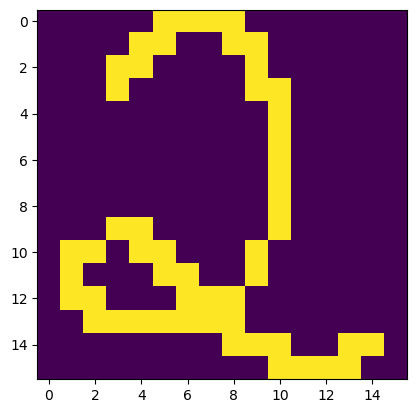

In [312]:
plt.imshow(img1)

print(" Our prediction against image1\n Digit: ", TestX_imgs_classes[0])
print("\n\n*Actual Digit*")

In [275]:
img35 = TestX[34:35, :]

In [276]:
img35.shape

(1, 256)

In [277]:
img35 = np.reshape(img1,(16, 16), order ='F')

In [278]:
img35.shape

(16, 16)

 Our prediction against image35
 Digit:  2


*Actual Digit*


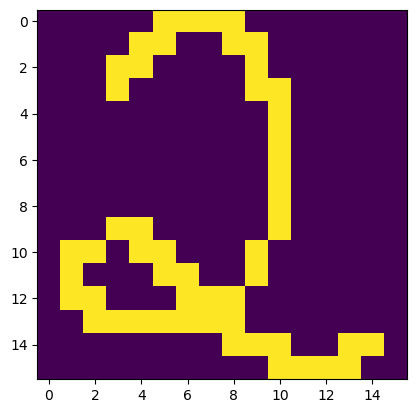

In [313]:
plt.imshow(img35)

print(" Our prediction against image35\n Digit: ", TestX_imgs_classes[34])
print("\n\n*Actual Digit*")

In [321]:
img51 = TestX[50:51, :]

In [322]:
img51.shape

(1, 256)

In [323]:
img51 = np.reshape(img51,(16, 16), order ='F')

In [324]:
img51.shape

(16, 16)

 Our prediction against image51
 Digit:  4


*Actual Digit*


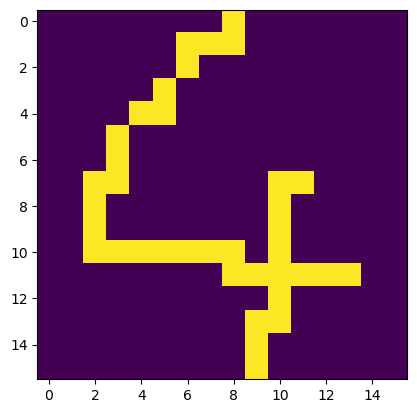

In [325]:
plt.imshow(img51)

print(" Our prediction against image51\n Digit: ", TestX_imgs_classes[50])
print("\n\n*Actual Digit*")

In [327]:
img78 = TestX[77:78, :]

In [328]:
img78.shape

(1, 256)

In [329]:
img78 = np.reshape(img78,(16, 16), order ='F')

In [330]:
img78.shape

(16, 16)

 Our prediction against image78
 Digit:  4


*Actual Digit*


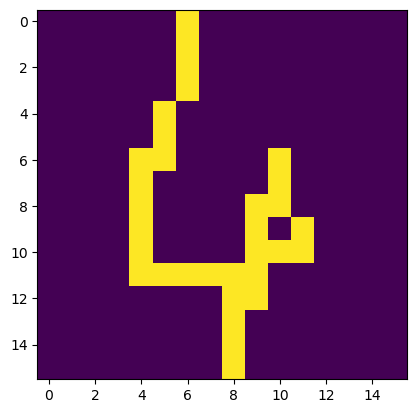

In [332]:
plt.imshow(img78)

print(" Our prediction against image78\n Digit: ", TestX_imgs_classes[77])
print("\n\n*Actual Digit*")

In [ ]:
# This it means our model is resulting predictions accurately...